### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

### Load the data

In [9]:
raw_data = pd.read_csv("data/1.04.+Real-life+example.csv")
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

Dataset ini berisi dengan data mobil second yang tabelnya memiliki merek, harga, tipe badan, mileage, engineV, tipe mesin, mobil teregistrasi atau tidak, tahun keluaran, serta model.

kita ingin memprediksi harga mobil, tergantung dengan prediksinya.

### Note penting (untuk variabel independen):
- Brand : bisa jadi jadi faktor paling utama
- Mileage : makin tinggi mileagenya, maka harganya biasanya akan semakin murah
- EngineV (Engine Volume) : mobil sports memiliki mesin yang volumenya lebih tinggi dibanding dengan mobil ekonomi
- Year : tahun keluaran mobil tersebut, makin tua, maka akan makin murah mobil tersebut (dengan pengecualian untu mobil lawas).

Attribut lainnya merupakan categorical variables (Engine Type, Registration, Model) dan penyelesaiannya melalui case-by-case

### Preprocessing

### Exploring descriptive Statistics from data.

In [10]:
raw_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

kita hanya mendapatkan descriptive data untuk numerical variable. kita harus menambahkan (include='all') agar dapat melihat semua descriptive statistic dari masing-masing variable. dalam bari unique, kita dapat melihat unique entries dalam categorical variable. terdapat 312 model yang unik yang terdapat pada dataset ini. terdapat juga category yang paling umum pada baris top, diikuti dengan frekuensinya dibawahnya.   

dapat terlihat, masing-masing variabel memiliki count yang berbeda. terutama di price, dan enginev. terdapat data yang hilang di 2 variabel itu. apa yang harus kita lakukan?

### Determining varible of interest

In [124]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4345   4173.00   4345  4345.00  4195.00        4345   
unique           7       NaN      6      NaN      NaN           4   
top     Volkswagen       NaN  sedan      NaN      NaN      Diesel   
freq           936       NaN   1649      NaN      NaN        2019   
mean           NaN  19418.75    NaN   161.24     2.79         NaN   
std            NaN  25584.24    NaN   105.71     5.07         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    86.00     1.80         NaN   
50%            NaN  11500.00    NaN   155.00     2.20         NaN   
75%            NaN  21700.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          4345 4345.00  
unique            2     NaN  
top             yes     NaN  
freq           3947     NaN  
mean            NaN 2006.55  
std             NaN    6.72  
min             NaN 1969.00  
25%             NaN 2003.00  
50%             NaN 2008.00  
75%             NaN 2012.00  
max             NaN 2016.00

### Dealing Missing Value

Price dan EngineV memiliki banyak missing value, apa yang harus kita lakukan?

In [17]:
#untuk mengecek missing value
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Dapat terlihat, Price memiliki 172 missing value, serta EngineV memiliki 150 missing value. karena jumlahnya dibawah 5%, maka kita bisa menghapus data yang memiliki missing value.

In [18]:
data_no_mv = data.dropna(axis=0)

In [20]:
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Exploring the PDF

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

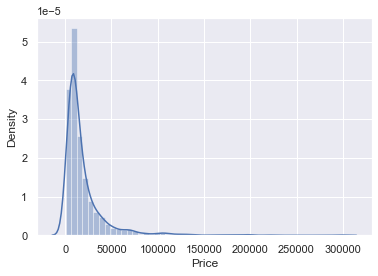

In [21]:
sns.distplot(data_no_mv['Price'])

Price memiliki exponential distribution, hal ini ditakutkan menyebabkan masalah nantinya. Karena kita membutuhkan normal distribution.

### Dealing With Outliers

In [23]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

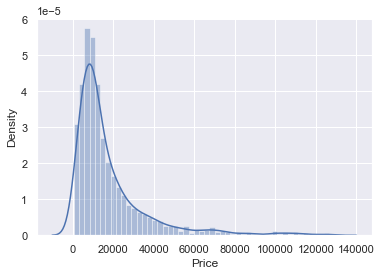

In [24]:
sns.distplot(data_1['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

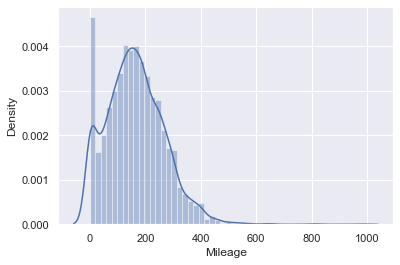

In [25]:
sns.distplot(data_no_mv['Mileage'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

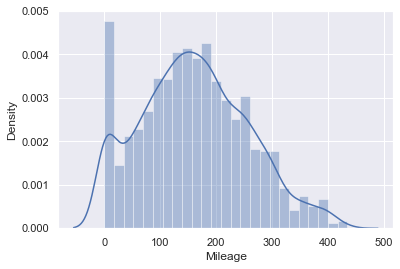

In [28]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

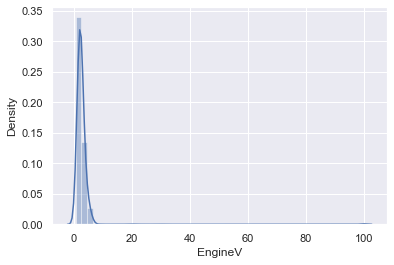

In [30]:
sns.distplot(data_no_mv['EngineV'])

Penjelasan terhadap adanya nilai 99 di EngineV adalah 99 sering digunakan untuk mengisi missing value. 

In [31]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

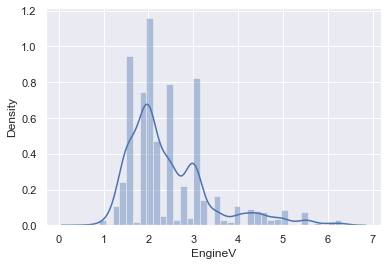

In [33]:
sns.distplot(data_3['EngineV'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

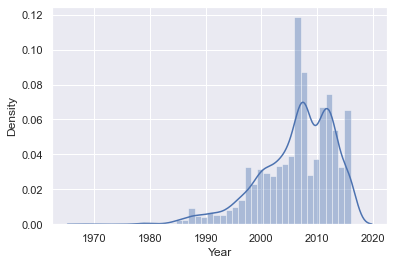

In [35]:
sns.distplot(data_no_mv['Year'])

masalah di 'Year', adalah terdapat beberapa outlier yang merupakan mobil tua. disini kita akan mengambil nilai 1% yang paling rendah, kemudian membiarkan yang lebih tinggi daripada nilai 1% tadi

In [36]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

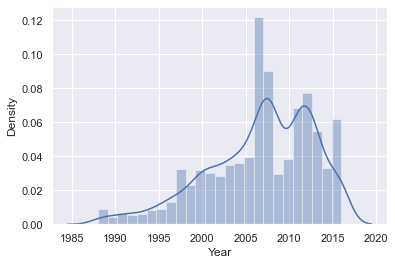

In [37]:
sns.distplot(data_4['Year'])

In [39]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Checking OLS Assumptions

biasanya, numerical variable bisa menyebabkan masalah yang lebih besar dibanding dengan categorical variable.

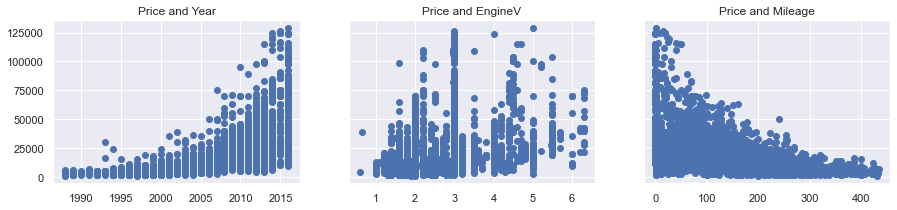

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title("Price and Mileage")

plt.show()

terlihat sebuah pola, tapi bukan sebuah pola yang linear. berarti kita tidak bisa melakukan linear regression. kita harus melakukan transformasi kepada 1 atau lebih variable. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

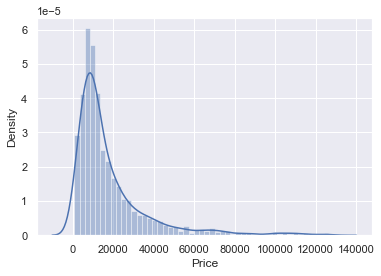

In [42]:
sns.distplot(data_cleaned['Price'])

Price juga tidak memiliki normal distribution. Log transformation akan digunakan untuk mengatasi isu ini. Log transformation akan jadi sangat berguna terutama saat menghadapi exponential scatter plot seperti diatas tadi. 

### Relaxing the Assumptions

In [43]:
log_price = np.log(data_cleaned['Price'])
data_cleaned ['log_price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  log_price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3862          yes  2008   9.350102  
3863          yes  2014   9.792556  
3864          yes  2014  11.736069  
3865          yes  1999   8.779557  
3866          yes  2013   9.510445  

[3867 rows x 9 columns]

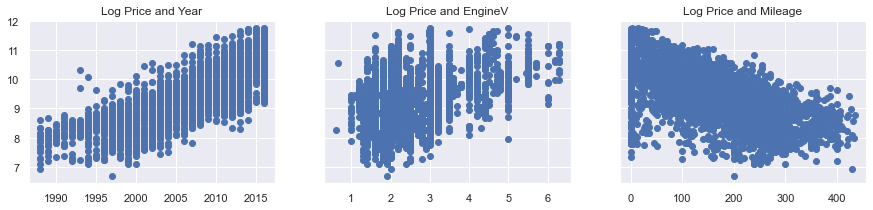

In [44]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title("Log Price and EngineV")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title("Log Price and Mileage")

plt.show()

didapatkanlah pola linear disemua variabel. garis nya sangat cocok kepada data yang ada. 

In [45]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
3862     Volkswagen        van      163      2.5      Diesel          yes   
3863         Toyota      sedan       35      1.6      Petrol          yes   
3864  Mercedes-Benz      sedan        9      3.0      Diesel          yes   
3865            BMW      sedan        1      3.5      Petrol          yes   
3866     Volkswagen        van      124      2.0      Diesel          yes   

      Year  log_price  
0     1991   8.342840  
1     1999   8.974618  
2     2003   9.495519  
3     2007  10.043249  
4     2011   9.814656  
...    ...        ...  
3862  2008   9.350102  
3863  2014   9.792556  
3864  2014  11.736069  
3865  1999   8.779557  
3866  2013   9.510445  

[3867 rows x 8 columns]

selanjutnya kita akan berurusan dengan asumsi:
- linearity
- no endogeneity, ada test untuk memastikan asumsi itu tidak dilanggar. 
- Normaliity dan homoscedasticity  juga perlu kita test (normality, zero mean, dan homoscedasticity) log transformation merupakan cara umum untuk mencegah heteroscedasticity untuk terjadi. 
- asumsi selanjutnya adalah no autocorrelation, hal ini tidak perlu kita lakukan dikasus ini. Karena tipe datanya bukan time series atau panel data. tidak ada alasan mengapa masing-masing observasi dependen terhadap satu sama lain.

### Multicollinearity

In [46]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

masuk akal jika 'Year' dan 'Mileage' akan berkorelasi, makin tua tahunnya maka mileage yang ditempuh akan makin banyak bukan? cara terbaik untuk mengecek multicollinearity adalah dengan VIF (variance inflaion factor) didalam statsmodel. VIF menghasilkan nilai yang mengukur seberapa besar akar dari standard error estimasi yang nanti dibandingkan dengan situasi dimana variabel 100% tidak memiliki korelasi dengan preditor lainnya.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned [['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [49]:
vif

VIF Features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

Jika vif = 1, maka tidak ada multicollinearity. 
jika vif berada diantara 1 sampai 5, masih oke. 
vif diatas 5,6 atau bahkan 10, tidak bisa diterima. 
disini variabel yang akan didrop adalah variabel year, karna terlalu memiliki korelasi dengan variabel lainnya

In [51]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
3862     Volkswagen        van      163      2.5      Diesel          yes   
3863         Toyota      sedan       35      1.6      Petrol          yes   
3864  Mercedes-Benz      sedan        9      3.0      Diesel          yes   
3865            BMW      sedan        1      3.5      Petrol          yes   
3866     Volkswagen        van      124      2.0      Diesel          yes   

      log_price  
0      8.342840  
1      8.974618  
2      9.495519  
3     10.043249  
4      9.814656  
...         ...  
3862   9.350102  
3863   9.792556  
3864  11.736069  
3865   8.779557  
3866   9.510445  

[3867 rows x 7 columns]

### Create Dummy Variable

In [53]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [54]:
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

ini membuat beberapa hal yang sebelumnya rumit, menjadi lebih simple karena kita hanya memerlukan 1 baris kode untuk membuat variabel dummy. 

### Homework
1. Cek VIF dari fitur, termasuk untuk dummy variables
2. Temukan VIF dari fitur, dimana kita tidak menghapus salah satu dummy. 

### Checking VIF

In [59]:
variables = data_with_dummies
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [60]:
vif

VIF             Features
0    4.460434              Mileage
1   13.445639              EngineV
2   41.981260            log_price
3    2.603990            Brand_BMW
4    3.084356  Brand_Mercedes-Benz
5    1.830297     Brand_Mitsubishi
6    2.281498        Brand_Renault
7    2.406546         Brand_Toyota
8    3.312814     Brand_Volkswagen
9    1.583516           Body_hatch
10   1.597487           Body_other
11   3.455354           Body_sedan
12   1.810633           Body_vagon
13   2.579105             Body_van
14   1.711589      Engine Type_Gas
15   1.082223    Engine Type_Other
16   2.506715   Engine Type_Petrol
17  15.167906     Registration_yes

### Rearrange the Column
agar dependent variable nya berada didepan

In [61]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [63]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [64]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

### Linear Regression Model

### Declare inputs and target

In [115]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Feature Selections

In [116]:
from sklearn.feature_selection import f_regression
f_regression(inputs,targets)

(array([2348.68929931,  789.888682  ,   31.82907337,   63.04307266,
          25.43007179,  174.4228831 ,   86.89409102,   43.84033485,
          75.51499679,    4.47798855,   68.39846543,  128.30541604,
          59.54688724,   29.77594278,    3.69629082,    6.94646292,
        1054.53025797]),
 array([0.00000000e+000, 2.65855077e-158, 1.80420259e-008, 2.62901969e-015,
        4.79766231e-007, 5.52787198e-039, 1.87306983e-020, 4.05331961e-011,
        5.26975221e-018, 3.43978741e-002, 1.81728039e-016, 2.77241307e-029,
        1.50990623e-014, 5.15395626e-008, 5.46069820e-002, 8.43206723e-003,
        9.25417095e-205]))

In [119]:
p_values = f_regression(inputs,targets)[1]
p_values = p_values.round(3)
p_values

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.034, 0.   , 0.   , 0.   , 0.   , 0.055, 0.008, 0.   ])

In [123]:
reg_sum = pd.DataFrame(data=inputs.columns.values,columns=['Features'])
reg_sum ['Coefficients'] = reg.coef_
reg_sum ['P-value'] = p_values.round(3)
reg_sum

Features  Coefficients  P-value
0               Mileage         -0.45     0.00
1               EngineV          0.21     0.00
2             Brand_BMW          0.01     0.00
3   Brand_Mercedes-Benz          0.01     0.00
4      Brand_Mitsubishi         -0.14     0.00
5         Brand_Renault         -0.18     0.00
6          Brand_Toyota         -0.06     0.00
7      Brand_Volkswagen         -0.09     0.00
8            Body_hatch         -0.15     0.00
9            Body_other         -0.10     0.03
10           Body_sedan         -0.20     0.00
11           Body_vagon         -0.13     0.00
12             Body_van         -0.17     0.00
13      Engine Type_Gas         -0.12     0.00
14    Engine Type_Other         -0.03     0.06
15   Engine Type_Petrol         -0.15     0.01
16     Registration_yes          0.32     0.00

### Scale Our data

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [68]:
inputs_scaled = scaler.transform(inputs)

tidak disarankan untuk melakukan standardization kepada dummy variable, bahkan banyak sekali yang menentang. tapi kita tetap melakukannya karena scaling tidak memiliki efek terhadap predictive power dari dummies. namun setelah mengalami scaling, dummy variables kehilangan arti dummy mereka

### Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split (inputs_scaled, targets, test_size=0.2, random_state=365)

terbuatlah 4 variable baru yang bertujuan untuk training model dan testing model.

### Create the Regression

In [72]:
reg = LinearRegression()
reg.fit(x_train,y_train)
#hasilnya adalah log linear regression, karena kita menggunakan log_price.

LinearRegression()

In [73]:
y_hat = reg.predict(x_train)

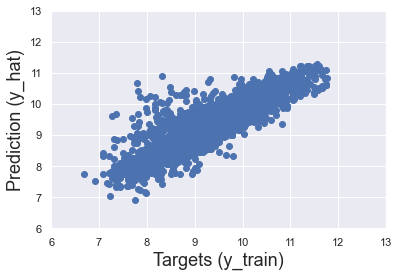

In [76]:
#First check, garis regresi 45 derajat
plt.scatter(y_train,y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Prediction (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Dalam best case scenario, jika targetnya 10, maka kita ingin predictionnya juga 10. jika target 5, maka kita ingin predictionnya juga 5. Pada akhirnya kita ingin bisa menarik garis 45 derajat yang menunjukkan best possible match dari prediction dan targets.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

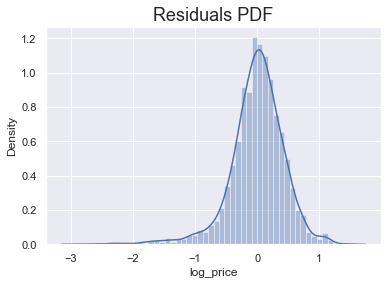

In [77]:
#Second Check, Residual plot
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

Dari Regression assumptions kita tahu bahwa, errors harus memiliki normal distribution, memiliki zero mean, dan memiliki homoscedasticity. Residuals merupakan cerminan dari errors, jadi kita bisa melihatnya disini. 
terlihat residuals memiliki normal distribution, dan memiliki zero mean. kemungkinan masalahnya hanya ada tail yang panjang pada sisi negatif. jadi, ada observasi tertentu dimana y_train(targets) - y_hat(predictions) jauh lebih rendah dari mean. ini berarti, prediksi tersebut cenderung overestimate targetnya. kita juga bisa menyimpulkan bahwa prediciton nya jarang sekali underestimate target. karena tidak ada tail yang panjang di sisi positif. 
ini bisa digunakan untuk meningkatkan model kita menjadi lebih baik lagi. 

In [78]:
reg.score(x_train,y_train)
#model kita menjelaskan 75% variabilitas dari data.

0.744996578792662

### Finding Weight and bias

In [79]:
reg.intercept_
#Bias

9.415239458021299

In [80]:
reg.coef_
#Weight

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [82]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.448713
1               EngineV  0.209035
2             Brand_BMW  0.014250
3   Brand_Mercedes-Benz  0.012882
4      Brand_Mitsubishi -0.140552
5         Brand_Renault -0.179909
6          Brand_Toyota -0.060550
7      Brand_Volkswagen -0.089924
8            Body_hatch -0.145469
9            Body_other -0.101444
10           Body_sedan -0.200630
11           Body_vagon -0.129887
12             Body_van -0.168597
13      Engine Type_Gas -0.121490
14    Engine Type_Other -0.033368
15   Engine Type_Petrol -0.146909
16     Registration_yes  0.320473

### Continioues Variables
- Dependent variable nya berbentuk logaritma dan featuresnya sudah mengalami standardization, termasuk dummy variable.
- Jika kita lihat dari tabel summary, maka terlihat ada weights yang positif. Positif weights berarti, jika features tersebut mengalami peningkatan, maka price dan log_price juga akan mengalami peningkatan. Negative weights berarti, jika feature nya mengalami peningkatan di nilainya, maka price dan log_price akan mengalami penurunan.
- Positive Weights : EngineV, Brand_BMW, Brand_Mercedes-Benz, Brand_Renault, Registration_Yes

In [89]:
data_cleaned['Brand'].unique()
#Benchmark Audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [88]:
data_cleaned['Body'].unique()
#Benchmark Crossover

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [90]:
data_cleaned['Engine Type'].unique()
#Benchmark Diesel

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [91]:
data_cleaned['Registration'].unique()
#Benchmark no

array(['yes', 'no'], dtype=object)

### Dummy Variables
- Positive weights menunjukkan bahwa masing-masing kategori lebih mahal dengan benchmarknya, dalam kasus ini dikategori brand yang menjadi benchmarknya adalah audi. Berarti BMW, Mercedes-Benz lebih mahal dibandingkan Audi.
- Negative Weights menunjukkan harganya lebih rendah dibanding dengan benchmark. contoh, renault Mitsubishi, Toyota, Volkswagen harganya lebih rendah dibandingkan Audi.

Weight yang kita dapatkan adalah standardized weight, dan standardized weight ini dapat dibandingkan. tapi tidak masuk akal untuk membandingkat contonious variable dengan dummy variable. Dummy hanya bisa dibandingkan dengan benchmark dari masing-masing kategori.

### Testing

In [92]:
y_hat_test = reg.predict(x_test)

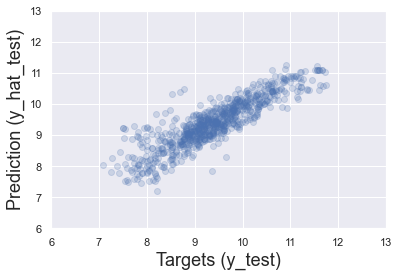

In [94]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Prediction (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Dalam harga yang lebih tinggi, kita memiliki konsentrasi nilai yang tinggi di sekitar garis 45 derajat. berarti, model kita sangat baik dalam memprediksi harga tinggi. namun untuk harga yang lebih rendah, kondisinya kurang bagus. karena pada harga yang lebih rendah, datanya lebih tersebar, menunjukkan bahwa kita kurang tepat dalam memprediksi harganya.

In [97]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

Predictions
0  10685.501696
1   3499.255242
2   7553.285218
3   7463.963017
4  11353.490075

Jika kita mengambil eksponen dari log_price, maka kita akan mendapatkan prediksi harga aslinya.

In [99]:
df_pf['Targets'] = np.exp(y_test)
df_pf

Predictions  Targets
0    10685.501696      NaN
1     3499.255242   7900.0
2     7553.285218      NaN
3     7463.963017      NaN
4    11353.490075      NaN
..            ...      ...
769  29651.726363   6950.0
770  10732.071179      NaN
771  13922.446953      NaN
772  27487.751303      NaN
773  13491.163043      NaN

[774 rows x 2 columns]

In [102]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [103]:
df_pf['Targets'] = np.exp(y_test)
df_pf

Predictions  Targets
0    10685.501696   2300.0
1     3499.255242   2800.0
2     7553.285218   2500.0
3     7463.963017   6400.0
4    11353.490075   9150.0
..            ...      ...
769  29651.726363  29500.0
770  10732.071179   9600.0
771  13922.446953  18300.0
772  27487.751303  68500.0
773  13491.163043  10800.0

[774 rows x 2 columns]

In [105]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']
#OLS bertujuan untuk meminimalisir SSE, hal ini dicapai dengan cara meminimalisir SSR (Summed Squared Residual)

In [110]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

Predictions  Targets      Residual  Difference%
0    10685.501696   2300.0  -8385.501696   364.587030
1     3499.255242   2800.0   -699.255242    24.973402
2     7553.285218   2500.0  -5053.285218   202.131409
3     7463.963017   6400.0  -1063.963017    16.624422
4    11353.490075   9150.0  -2203.490075    24.081859
..            ...      ...           ...          ...
769  29651.726363  29500.0   -151.726363     0.514327
770  10732.071179   9600.0  -1132.071179    11.792408
771  13922.446953  18300.0   4377.553047    23.921055
772  27487.751303  68500.0  41012.248697    59.871896
773  13491.163043  10800.0  -2691.163043    24.918176

[774 rows x 4 columns]

In [111]:
df_pf.describe()

Predictions        Targets      Residual  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   15946.760167   18165.817106   2219.056939    36.256693
std    13133.197604   19967.858908  10871.218143    55.066507
min     1320.562768    1200.000000 -29456.498331     0.062794
25%     7413.644234    6900.000000  -2044.191251    12.108022
50%    11568.168859   11600.000000    142.518577    23.467728
75%    20162.408805   20500.000000   3147.343497    39.563570
max    77403.055224  126000.000000  85106.162329   512.688080

- Minimum Difference% adalah 0.06%, sangat tepat sekali. namun maksimum Difference% adalah 512.68% 
- selain minimum maximum, terdapat juga percentile yang intinya dari seluruh prediksi kita, cukup dekat.

In [114]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by='Difference%')

Predictions   Targets  Residual  Difference%
698     30480.85  30500.00     19.15         0.06
742     16960.31  16999.00     38.69         0.23
60      12469.21  12500.00     30.79         0.25
110     25614.14  25500.00   -114.14         0.45
367     42703.68  42500.00   -203.68         0.48
369      3084.69   3100.00     15.31         0.49
769     29651.73  29500.00   -151.73         0.51
272      9749.53   9800.00     50.47         0.52
714     23118.07  22999.00   -119.07         0.52
630      8734.58   8800.00     65.42         0.74
380      3473.79   3500.00     26.21         0.75
648     21174.10  21335.00    160.90         0.75
308      8967.74   8900.00    -67.74         0.76
665     17858.02  18000.00    141.98         0.79
379     17654.84  17800.00    145.16         0.82
719     11391.95  11500.00    108.05         0.94
102     28625.56  28900.00    274.44         0.95
94       7724.17   7800.00     75.83         0.97
561      6429.03   6500.00     70.97         1.09
242      7597.39   7500.00    -97.39         1.30
528     18555.09  18800.00    244.91         1.30
61       7396.87   7300.00    -96.87         1.33
19      16178.14  16400.00    221.86         1.35
280     12327.10  12499.00    171.90         1.38
311     51287.19  52055.25    768.06         1.48
723      6009.63   6100.00     90.37         1.48
49       4973.17   4900.00    -73.17         1.49
114     27716.14  27300.00   -416.14         1.52
636     28498.91  28950.00    451.09         1.56
612      2953.17   3000.00     46.83         1.56
47      26425.14  25999.00   -426.14         1.64
23      13111.91  12900.00   -211.91         1.64
31      12858.08  12650.00   -208.08         1.64
91      13421.16  13200.00   -221.16         1.68
329      7327.18   7200.00   -127.18         1.77
549      3816.33   3750.00    -66.33         1.77
252      9721.50   9900.00    178.50         1.80
387     44173.72  44999.00    825.28         1.83
267     40753.58  40000.00   -753.58         1.88
467     22262.80  22711.65    448.85         1.98
556     18231.44  18600.00    368.56         1.98
165      9596.94   9400.00   -196.94         2.10
259      6067.79   6200.00    132.21         2.13
601     35371.16  34600.00   -771.16         2.23
708     11967.39  11700.00   -267.39         2.29
593     17908.00  17500.00   -408.00         2.33
398      8707.13   8500.00   -207.13         2.44
526     29049.27  28350.00   -699.27         2.47
603     14513.46  14900.00    386.54         2.59
53      20453.89  21000.00    546.11         2.60
632     15383.35  14990.00   -393.35         2.62
533     24642.50  24000.00   -642.50         2.68
497     50099.92  51500.00   1400.08         2.72
212     16133.86  15700.00   -433.86         2.76
130     17489.92  18000.00    510.08         2.83
290      1894.40   1950.00     55.60         2.85
78      30810.25  29900.00   -910.25         3.04
642      8721.97   8999.00    277.03         3.08
437     18866.50  18300.00   -566.50         3.10
101      5958.63   6150.00    191.37         3.11
314      5811.74   6000.00    188.26         3.14
150      9800.43   9500.00   -300.43         3.16
565      7324.63   7100.00   -224.63         3.16
574     12583.52  13000.00    416.48         3.20
591     10115.13   9800.00   -315.13         3.22
172     11156.38  10800.00   -356.38         3.30
133      9279.28   9600.00    320.72         3.34
480     31369.37  32500.00   1130.63         3.48
87       2315.71   2400.00     84.29         3.51
11       5175.77   5000.00   -175.77         3.52
43      21611.83  22400.00    788.17         3.52
96       7976.26   7700.00   -276.26         3.59
406     24874.86  23999.00   -875.86         3.65
173     36516.35  37900.00   1383.65         3.65
540      4666.05   4500.00   -166.05         3.69
40      18672.68  18000.00   -672.68         3.74
340     14815.83  15400.00    584.17         3.79
239     10581.62  10999.00    417.38         3.79
109     12663.54  12200.00   -463.54         3.80
256  

Residuals dari Outliers kita, negatif. Berarti prediksinya lebih tinggi dibanding target. penjelasannya mungkin, kita melewatkan faktor penting yang membuat harga dari mobil bekas lebih rendah. Mungkin model dari mobil tersebut (yang sebelumnya kita remove) atau mungkin mobil tersebut memiliki kerusakan (yang tidak kita miliki datanya)

### Cara meningkatkan performa model
1. Menggunakan himpunan variabel yang berbeda
2. Menghapuskan bagian yang lebih besar dari outliers
3. Menggunakan tipe transformasi yang lain